In [2]:
"""--- Day 8: Treetop Tree House ---

The expedition comes across a peculiar patch of tall trees all planted carefully in a grid. The Elves explain that a previous expedition planted these trees as a reforestation effort. Now, they're curious if this would be a good location for a tree house.

First, determine whether there is enough tree cover here to keep a tree house hidden. To do this, you need to count the number of trees that are visible from outside the grid when looking directly along a row or column.

The Elves have already launched a quadcopter to generate a map with the height of each tree (your puzzle input). For example:

30373
25512
65332
33549
35390

Each tree is represented as a single digit whose value is its height, where 0 is the shortest and 9 is the tallest.

A tree is visible if all of the other trees between it and an edge of the grid are shorter than it. Only consider trees in the same row or column; that is, only look up, down, left, or right from any given tree.

All of the trees around the edge of the grid are visible - since they are already on the edge, there are no trees to block the view. In this example, that only leaves the interior nine trees to consider:

    The top-left 5 is visible from the left and top. (It isn't visible from the right or bottom since other trees of height 5 are in the way.)
    The top-middle 5 is visible from the top and right.
    The top-right 1 is not visible from any direction; for it to be visible, there would need to only be trees of height 0 between it and an edge.
    The left-middle 5 is visible, but only from the right.
    The center 3 is not visible from any direction; for it to be visible, there would need to be only trees of at most height 2 between it and an edge.
    The right-middle 3 is visible from the right.
    In the bottom row, the middle 5 is visible, but the 3 and 4 are not.

With 16 trees visible on the edge and another 5 visible in the interior, a total of 21 trees are visible in this arrangement.

Consider your map; how many trees are visible from outside the grid?
"""

"--- Day 8: Treetop Tree House ---\n\nThe expedition comes across a peculiar patch of tall trees all planted carefully in a grid. The Elves explain that a previous expedition planted these trees as a reforestation effort. Now, they're curious if this would be a good location for a tree house.\n\nFirst, determine whether there is enough tree cover here to keep a tree house hidden. To do this, you need to count the number of trees that are visible from outside the grid when looking directly along a row or column.\n\nThe Elves have already launched a quadcopter to generate a map with the height of each tree (your puzzle input). For example:\n\n30373\n25512\n65332\n33549\n35390\n\nEach tree is represented as a single digit whose value is its height, where 0 is the shortest and 9 is the tallest.\n\nA tree is visible if all of the other trees between it and an edge of the grid are shorter than it. Only consider trees in the same row or column; that is, only look up, down, left, or right from

In [3]:
example="""30373
25512
65332
33549
35390"""

In [4]:
with open("08.txt") as f:
    data = f.read()

In [5]:
import numpy as np

In [6]:
np.roll([1,2,3,4],-1)

array([2, 3, 4, 1])

In [7]:
np.roll([[1,2],[3,4]],-1,axis=0)

array([[3, 4],
       [1, 2]])

In [8]:
np.logical_or.reduce([True,False,True,True])

True

In [9]:
def solve(data):
    data = np.array([list(map(int, line)) for line in data.split()])
    # https://stackoverflow.com/a/66158289/11141271
    left_to_right = np.maximum.accumulate(data, axis=1)
    right_to_left = np.maximum.accumulate(data[:, ::-1], axis=1)[:, ::-1]
    top_to_bottom = np.maximum.accumulate(data, axis=0)
    bottom_to_top = np.maximum.accumulate(data[::-1], axis=0)[::-1]
    # trees of the same height obstruct eachother so we need to not count trees that are the same height as neighbours
    # we can do this by ensuring the data isn't equal to a rolled value
    col1 = np.zeros(left_to_right.shape, dtype=bool)
    col1[:, 0] = True

    row1 = np.zeros(left_to_right.shape, dtype=bool)
    row1[0, :] = True

    collast = np.zeros(left_to_right.shape, dtype=bool)
    collast[:, -1] = True

    rowlast = np.zeros(left_to_right.shape, dtype=bool)
    rowlast[-1, :] = True

    leftvis = np.logical_and(data >= left_to_right, np.logical_or(data != np.roll(left_to_right, 1, axis=1), col1))
    rightvis = np.logical_and(data >= right_to_left, np.logical_or(data != np.roll(right_to_left, -1, axis=1), collast))
    topvis = np.logical_and(data >= top_to_bottom, np.logical_or(data != np.roll(top_to_bottom, 1, axis=0), row1))
    bottomvis = np.logical_and(data >= bottom_to_top, np.logical_or(data != np.roll(bottom_to_top, -1, axis=0), rowlast))

    return np.sum(np.logical_or.reduce([leftvis, rightvis, topvis, bottomvis]))

print(solve(example))
print(solve(data))

21
1688


In [10]:
"""--- Part Two ---

Content with the amount of tree cover available, the Elves just need to know the best spot to build their tree house: they would like to be able to see a lot of trees.

To measure the viewing distance from a given tree, look up, down, left, and right from that tree; stop if you reach an edge or at the first tree that is the same height or taller than the tree under consideration. (If a tree is right on the edge, at least one of its viewing distances will be zero.)

The Elves don't care about distant trees taller than those found by the rules above; the proposed tree house has large eaves to keep it dry, so they wouldn't be able to see higher than the tree house anyway.

In the example above, consider the middle 5 in the second row:

30373
25512
65332
33549
35390

    Looking up, its view is not blocked; it can see 1 tree (of height 3).
    Looking left, its view is blocked immediately; it can see only 1 tree (of height 5, right next to it).
    Looking right, its view is not blocked; it can see 2 trees.
    Looking down, its view is blocked eventually; it can see 2 trees (one of height 3, then the tree of height 5 that blocks its view).

A tree's scenic score is found by multiplying together its viewing distance in each of the four directions. For this tree, this is 4 (found by multiplying 1 * 1 * 2 * 2).

However, you can do even better: consider the tree of height 5 in the middle of the fourth row:

30373
25512
65332
33549
35390

    Looking up, its view is blocked at 2 trees (by another tree with a height of 5).
    Looking left, its view is not blocked; it can see 2 trees.
    Looking down, its view is also not blocked; it can see 1 tree.
    Looking right, its view is blocked at 2 trees (by a massive tree of height 9).

This tree's scenic score is 8 (2 * 2 * 1 * 2); this is the ideal spot for the tree house.

Consider each tree on your map. What is the highest scenic score possible for any tree?
"""

"--- Part Two ---\n\nContent with the amount of tree cover available, the Elves just need to know the best spot to build their tree house: they would like to be able to see a lot of trees.\n\nTo measure the viewing distance from a given tree, look up, down, left, and right from that tree; stop if you reach an edge or at the first tree that is the same height or taller than the tree under consideration. (If a tree is right on the edge, at least one of its viewing distances will be zero.)\n\nThe Elves don't care about distant trees taller than those found by the rules above; the proposed tree house has large eaves to keep it dry, so they wouldn't be able to see higher than the tree house anyway.\n\nIn the example above, consider the middle 5 in the second row:\n\n30373\n25512\n65332\n33549\n35390\n\n    Looking up, its view is not blocked; it can see 1 tree (of height 3).\n    Looking left, its view is blocked immediately; it can see only 1 tree (of height 5, right next to it).\n    Look

In [11]:
from IPython.display import Image
from matplotlib import pyplot as plt

In [1]:
%matplotlib ipympl

In [12]:
x = np.array([list(map(int, line)) for line in data.split()])
print(x)

[[2 1 1 ... 3 0 1]
 [3 1 1 ... 1 0 0]
 [0 0 1 ... 1 2 2]
 ...
 [1 2 0 ... 3 0 1]
 [2 1 2 ... 1 2 1]
 [0 0 2 ... 0 2 1]]


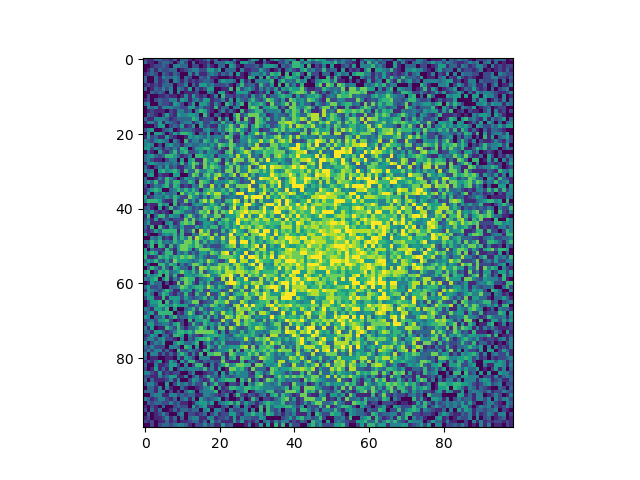

In [16]:
plt.figure(1)
plt.imshow(x)
plt.show()

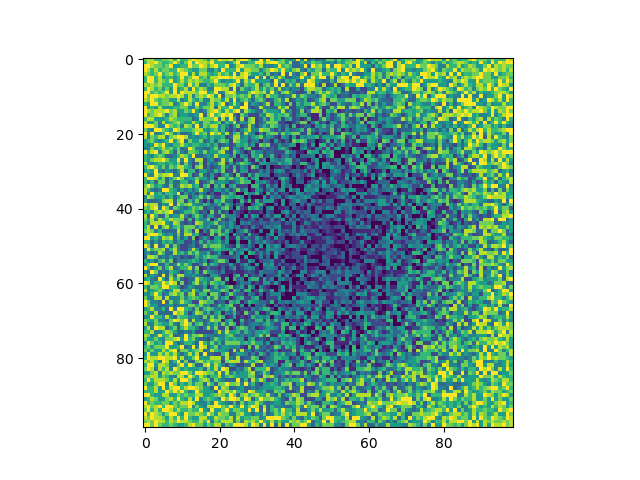

In [17]:
plt.figure(2)
plt.imshow(np.ones(x.shape)*x.max() - x)
plt.show()

In [ ]:
# # now we need to find the best spot for the tree house
# # the number surrounded by the most numbers that are smaller than it is the best spot
# # we don't count diagonals
# # we can do this by finding the maximum of the maximums of the 4 directions
# def solve2(data):
#     data = np.array([list(map(int, line)) for line in data.split()])


In [18]:
from scipy.signal import convolve

In [22]:
kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
# perform convolution with the kernel to count the number of trees in each direction
# from each tree in the grid
counts = convolve(x, kernel, mode='same')

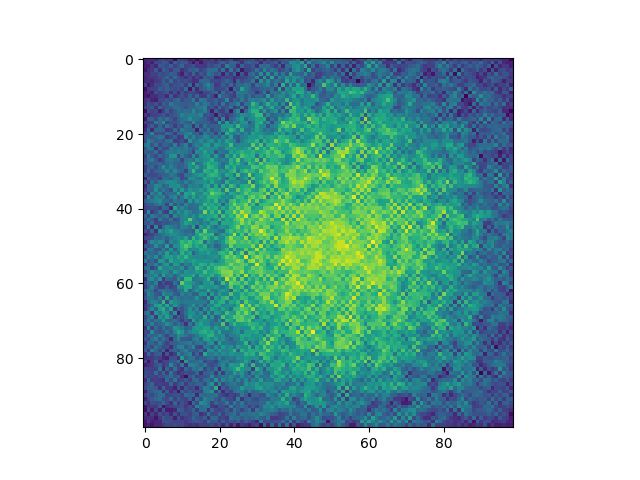

In [23]:
plt.figure(3)
plt.imshow(counts)
plt.show()

In [57]:
import math

In [62]:
def solve2(data):
    # convert the input data into a 2D array of integers
    data = np.array([list(map(int, line)) for line in data.split()])
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            i=1
            j=2
            candidateHeight = data[i, j]
            right = np.maximum.accumulate(data[i, j+1:] if j+1 < data.shape[1] else [])
            left = np.maximum.accumulate(data[i, :j][::-1] if j > 0 else [])
            down = np.maximum.accumulate(data[i+1:, j] if i+1 < data.shape[0] else [])
            up = np.maximum.accumulate(data[:i, j][::-1] if i > 0 else [])
            # count until we find a tree of equal or greater height
            # or until we reach the edge of the grid
            print(candidateHeight, up,down,left,right)
            print(
                (candidateHeight > up).sum(),
                (candidateHeight > down).sum(),
                (candidateHeight > left).sum(),
                (candidateHeight > right).sum(),
            )
            scenicScore = math.prod(x for x in (
                (candidateHeight > up).sum() + 1 if len(up) > 0 else 0,
                (candidateHeight > down).sum() + 1 if len(down) > 0 else 0,
                (candidateHeight > left).sum() + 1 if len(left) > 0 else 0,
                (candidateHeight > right).sum() + 1 if len(right) > 0 else 0,
            ) if x > 0)
            print(scenicScore)
            return
print(example)
print(solve2(example))
# print(solve2(data))


30373
25512
65332
33549
35390
5 [3] [3 5 5] [5 5] [1 2]
1 1 0 2
12
None
